# HW #2 and 3: Project Parts II and III
## **Group 8**: *Anna, Dhairya, Martin, Nikyah, Sindhura*

1. Here's some stuff in a list.
2. Here's some more stuff in a list.
    1. **_Here's some sublist stuff that's italicized and bolded._**
3. I can also include links to things. Here's a link to Anna's public repository for practice using Jupyter Notebook: https://github.com/ganagav/practice.git

The lists don't have to be ordered.
* Here's.
* Proof. 

Below this cell is the code for a LIF model neuron.

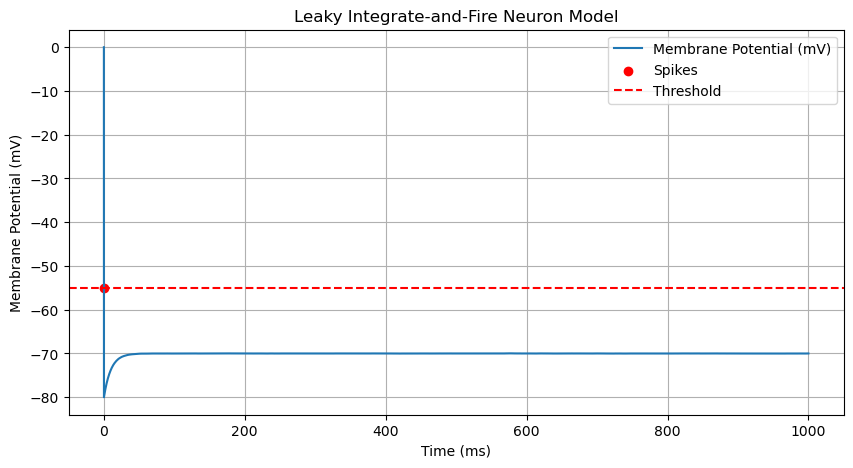

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Rm = 1.0  # Membrane resistance (Ohms)
Cm = 10.0  # Membrane capacitance (Farads)
Vrest = -70.0  # Resting membrane potential (mV)
Vth = -55.0  # Threshold potential (mV)
Vreset = -80.0  # Reset potential (mV)
dt = 0.1  # Time step (ms)

# Simulation parameters
simulation_time = 1000  # Simulation time (ms)
num_steps = int(simulation_time / dt)

# Initialize variables
time = np.arange(0, simulation_time, dt)
voltage = np.zeros(num_steps)
spike_times = []

# Simulation loop
for step in range(1, num_steps):
    # Leaky Integrate-and-Fire dynamics
    dVdt = (-(voltage[step - 1] - Vrest) + Rm * np.random.normal(0, 1) / Cm) / (Rm * Cm)
    voltage[step] = voltage[step - 1] + dVdt * dt
    
    # Check for spike (threshold crossing)
    if voltage[step] >= Vth:
        voltage[step] = Vreset  # Reset membrane potential
        spike_times.append(time[step])  # Record spike time

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, voltage, label='Membrane Potential (mV)')
plt.scatter(spike_times, [Vth] * len(spike_times), color='red', label='Spikes', marker='o')
plt.axhline(y=Vth, color='r', linestyle='--', label='Threshold')
plt.title('Leaky Integrate-and-Fire Neuron Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()


The most unrealistic aspect of this model is that there isn't a staggered rise leading to the release of the spike and consequent repeat of the pattern (gradual, staggered rise -> release of spike; assuming some tonic pattern). What's likely missing from this model is some representation of a leaky resistor (their biological equivalent being a voltage-gated ion channel. 

The most challenging part of this homework was trying to figure out what aspect of the model was most unlike a real biological neuron. It wasn't extremely hard, but it was comparatively more difficult than creating the introduction and trying out the different text customizations within the Markdown cells.

It took approximately 30 minutes to complete the homework.

# Homework 3: Project Part III

### Question 1: explain why the Leaky Integrate and Fire model needs to have voltage-gated sodium channels added to it in order to be a better model of a neuron and what doing this should theoretically accomplish / how it will change your visualizations? 
The leaky integrate and fire model needs to have voltage gated sodium channels added because these channels are responsible for generating action potentials transmitted along the neuron. Adding these channels would also give a better representation of the neurons spiking behavior and tell us how the initiation of action potentials is affected by stimuli. Doing this should theoretically simulate the behavior of a real neuron. It will change our visualizations by providing more accurate spiking patterns and propagation of signals.

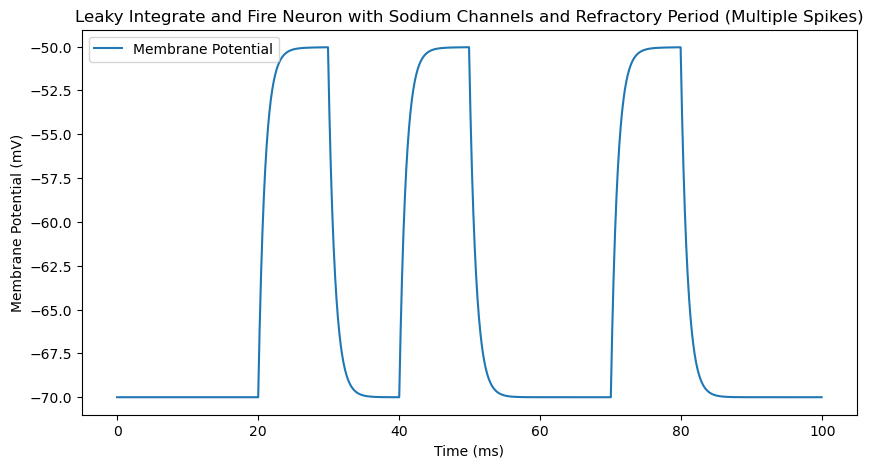

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C_m = 1.0  # Membrane capacitance (uF/cm^2)
R_m = 1.0  # Membrane resistance (kohm*cm^2)
tau_m = R_m * C_m  # Membrane time constant (ms)
E_leak = -70.0  # Leak reversal potential (mV)
V_threshold = -50.0  # Spike threshold (mV)
V_reset = -75.0  # Reset potential (mV)
refractory_period = 5.0  # Refractory period (ms)
g_Na_max = 0.1  # Maximal sodium conductance (mS/cm^2)
E_Na = 50.0  # Sodium reversal potential (mV)
delta_t = 0.1  # Time step (ms)
duration = 100.0  # Simulation duration (ms)

# Input current (in nA)
def input_current(t):
    if 20 < t < 30 or 40 < t < 50 or 70 < t < 80:
        return 20.0  # Increased current for spikes
    else:
        return 0.0

# Simulation
num_steps = int(duration / delta_t)
time = np.arange(0, duration, delta_t)
V = np.ones(num_steps) * E_leak  # Initial membrane potential
m = np.zeros(num_steps)  # Sodium activation
h = np.zeros(num_steps)  # Sodium inactivation
in_refractory = False
refractory_end = 0.0

# Leaky integrate-and-fire model with sodium channels and refractory period
for step in range(1, num_steps):
    if in_refractory:
        V[step] = V_reset
        refractory_end -= delta_t
        if refractory_end <= 0:
            in_refractory = False
    else:
        I_in = input_current(step * delta_t)
        
        # Update sodium channel variables (Hodgkin-Huxley model)
        alpha_m = 0.1 * (V[step - 1] + 40) / (1 - np.exp(-(V[step - 1] + 40) / 10))
        beta_m = 4.0 * np.exp(-(V[step - 1] + 65) / 18)
        alpha_h = 0.07 * np.exp(-(V[step - 1] + 65) / 20)
        beta_h = 1 / (1 + np.exp(-(V[step - 1] + 35) / 10))

        m[step] = m[step - 1] + delta_t * (alpha_m * (1 - m[step - 1]) - beta_m * m[step - 1])
        h[step] = h[step - 1] + delta_t * (alpha_h * (1 - h[step - 1]) - beta_h * h[step - 1])

        # Sodium conductance term
        g_Na = g_Na_max * m[step]**3 * h[step]
        I_Na = g_Na * (V[step - 1] - E_Na)
        
        dV_dt = (E_leak - V[step - 1] + R_m * I_in + I_Na) / tau_m
        V[step] = V[step - 1] + dV_dt * delta_t

        # Check for spike
        if V[step] >= V_threshold:
            V[step] = V_reset
            in_refractory = True
            refractory_end = refractory_period

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, V, label='Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate and Fire Neuron with Sodium Channels and Refractory Period (Multiple Spikes)')
plt.legend()
plt.show()


### 3. In order to modify the code to be a Voltage Gated Channel LIF neuron, we added in a version of the Hodgkin-Huxley Model. One issue that was encountered while trying to code this was getting the model to have multiple spikes. Another difficulty was attempting to make the code produce an output that was relatively realistic. In some models the Membrane Potential would be wildly out of range for a typical neuron and despite not being perfect above, is a better represenation of a neuron. 

### 4. In terms of working collaboratively in GitHub, this was realitvely easy. While initially requring getting more familiar with the layout, once familiar with the formatting and interface, this became a lot less challenging. Moving forward and as we use the software more, we anticipate GitHub becoming easier to work with and potentially even using things like branches and other feature in GitHub to make changes and document out progress more effectively. 